In [105]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import norm, skew
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE #generating synthetic samples of the minority class 
#from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
import math
from sklearn.preprocessing import StandardScaler

In [2]:
sound=pd.read_csv(r'/Users/souravghoshhansda/Library/CloudStorage/OneDrive-Personal/data_exploration_ml/voice.csv')

Describing the dataset

The dataset has different attributes of “sound” for males and females:

●       meanfreq: Mean frequency of the voice signal

●       sd: Standard deviation of the frequency

●       median: Median frequency

●       Q25: First quantile (25%) of the frequency

●       Q75: Third quantile (75%) of the frequency

●       IQR: Interquartile range

●       skew: Skewness of the frequency distribution

●       kurt: Kurtosis, a measure of the "tailedness" of the frequency distribution

●       sp.ent: Spectral entropy, a measure of signal complexity

●       sfm: Spectral flatness measure

●       centroid: Frequency centroid (mean frequency)

●       meanfun: Mean fundamental frequency measured across acoustic signal

●       minfun: Minimum fundamental frequency measured across acoustic signal

●       maxfun: Maximum fundamental frequency measured across acoustic signal

●       meandom: Mean dominant frequency of the acoustic signal

●       mindom: Minimum dominant frequency of the acoustic signal

●       maxdom: Maximum dominant frequency of the acoustic signal

●       dfrange: Dominant frequency range

●       modindx: Modulation index

●       label: Male or female voice - the target variable

The objective is to build a model which will accurately predict and classify any sound as male or female based on its attributes.

In [3]:
sound.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [84]:
sound.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,...,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,...,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752,0.500000
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,...,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454,0.500079
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,...,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,...,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766,0.000000
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,...,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357,0.500000
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,...,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183,1.000000
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,...,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374,1.000000


In [89]:
categorical_col = [] #Initializes an empty list to store the names of columns that are identified as categorical.
for column in sound.columns: #Iterates through each column in the DataFrame.
    if len(sound[column].unique()) <= 30:#Checks if the column's data type is 'object' (typically indicating a categorical variable) and if the number of unique values in that column is 30 or less.
        categorical_col.append(column) # If the conditions in the if statement are met, it appends the column name to the categorical_col list.
        print(f"{column} : {sound[column].unique()}") #Prints the name of the column and its unique values.
        print(f"{column} : {sound[column].value_counts()}")
        print("====================================") # Prints a separator line for clarity.
        
#The purpose of this code is to help you identify and inspect categorical columns in your DataFrame, particularly those with a manageable number of unique categories. This information is useful for data exploration and analysis, especially when you need to decide how to handle categorical variables in machine learning or data analysis tasks.

label : [1 0]
label : label
1    1584
0    1584
Name: count, dtype: int64


In [90]:
categorical_col

['label']

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

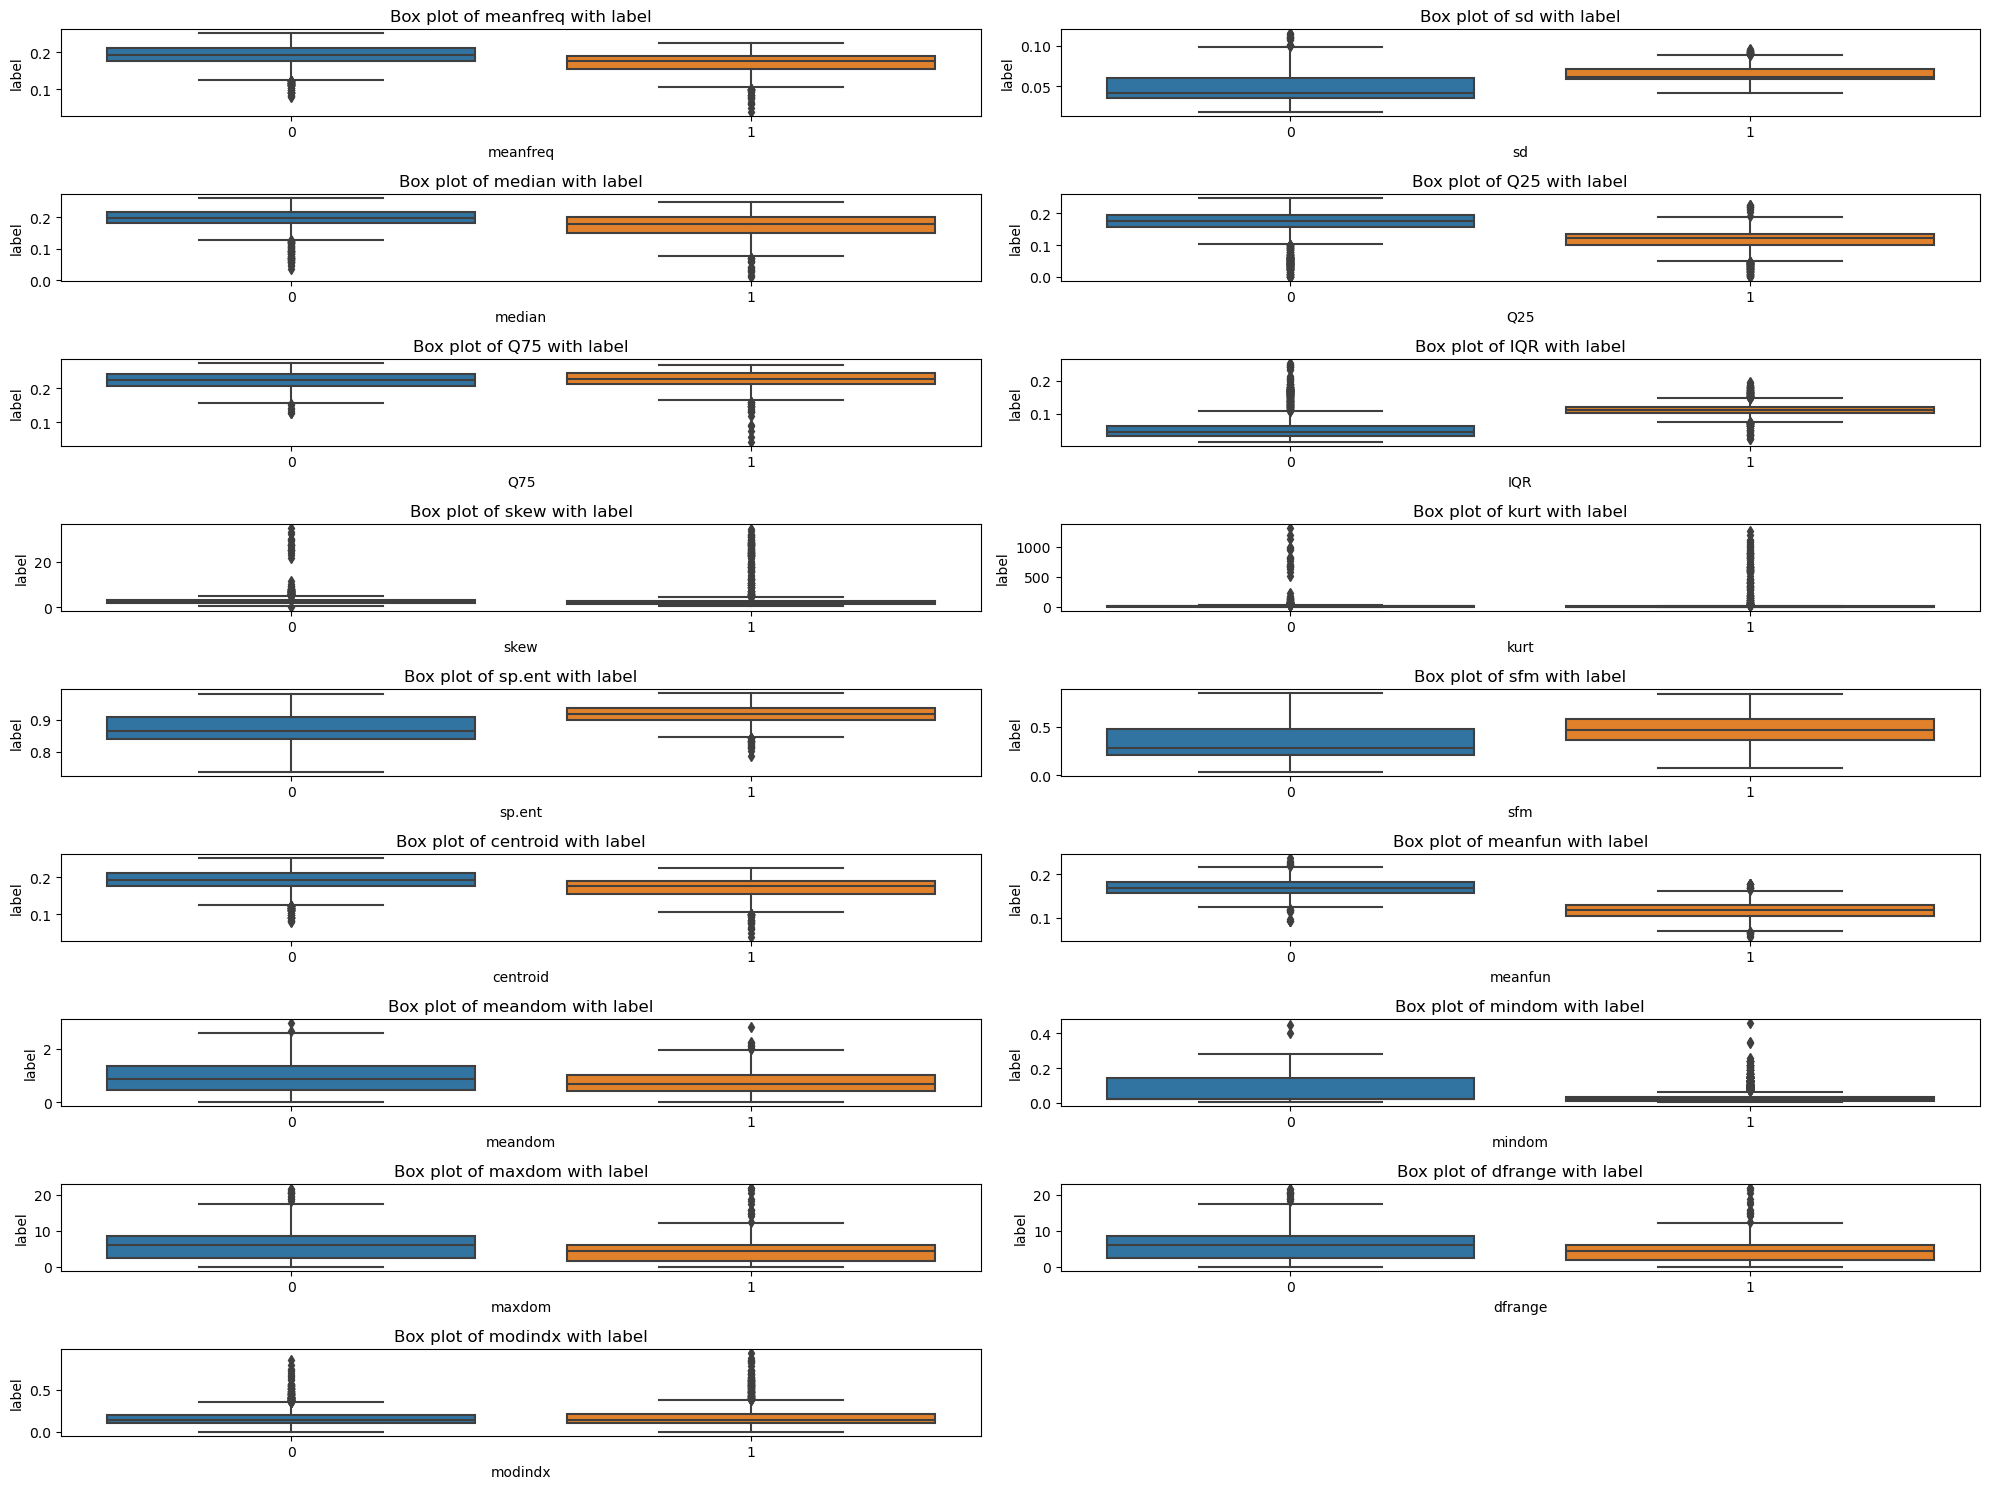

In [94]:
features = ['meanfreq', 'sd','median','Q25','Q75','IQR','skew','kurt','sp.ent','sfm','centroid','meanfun','meandom','mindom','maxdom','dfrange','modindx']

plt.figure(figsize=(20, 15))

for i, feature in enumerate(features, 1):
    plt.subplot(9, 2, i)#5rows, 2 columns
    sns.boxplot(y=feature, x='label', data=sound)
    plt.title(f'Box plot of {feature} with label')
    plt.xlabel(feature)
    plt.ylabel('label')

plt.tight_layout()
plt.show()

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='maxdom', ylabel='modindx'>

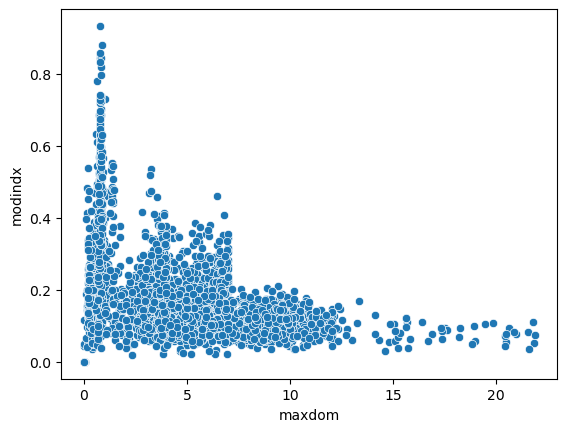

In [96]:
sns.scatterplot(x='maxdom',y='modindx',data=sound)

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='skew', ylabel='centroid'>

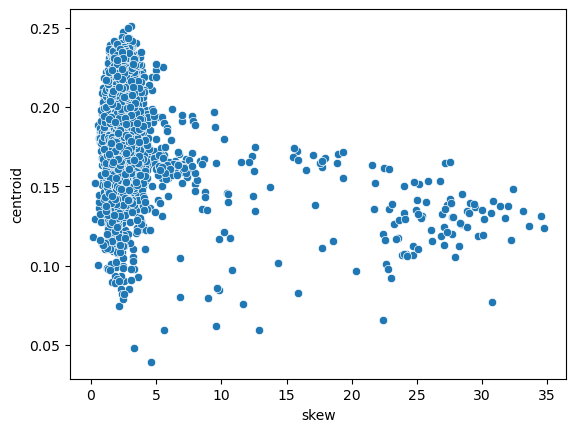

In [97]:
sns.scatterplot(x='skew',y='centroid',data=sound)

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Q25', ylabel='Q75'>

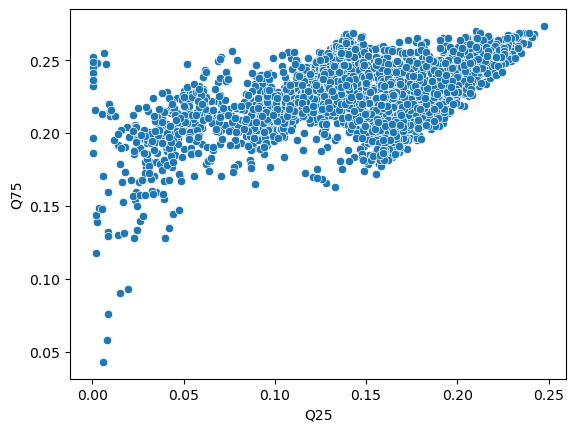

In [99]:
sns.scatterplot(x='Q25',y='Q75',data=sound)

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='meanfreq', ylabel='median'>

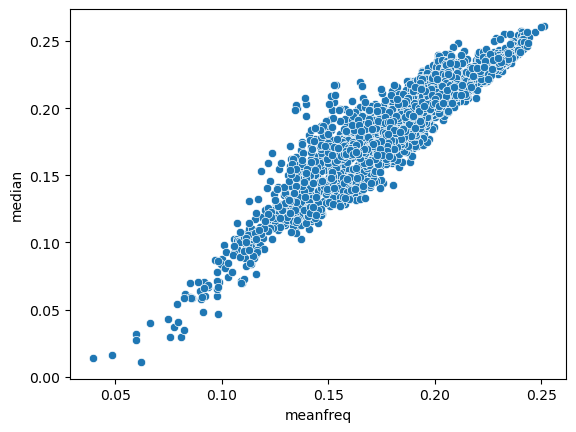

In [100]:
sns.scatterplot(x='meanfreq',y='median',data=sound)

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='IQR', ylabel='sp.ent'>

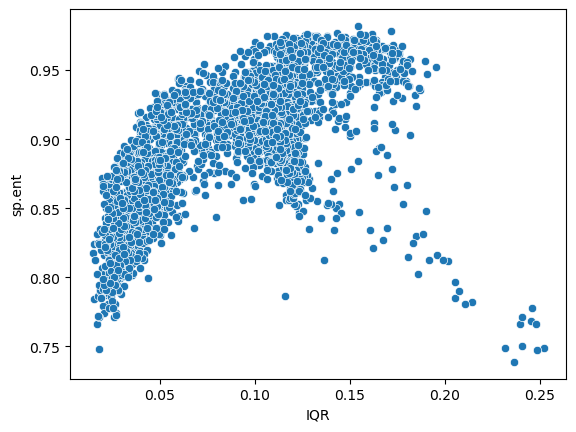

In [101]:
sns.scatterplot(x='IQR',y='sp.ent',data=sound)

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='meanfun', ylabel='meanfreq'>

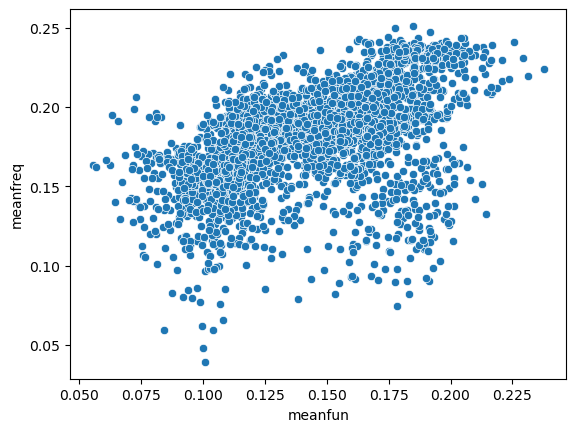

In [102]:
sns.scatterplot(x='meanfun',y='meanfreq',data=sound)

In [104]:
sound.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,...,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979,-0.337415
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,...,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660,0.479539
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,...,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298,-0.283919
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,...,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377,-0.511455
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,...,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475,0.066906
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,...,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252,0.618916
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,...,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325,0.036627
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,...,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539,0.087195
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,...,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074,0.490552
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,...,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477,0.357499


In [103]:
sound.groupby('label').median(numeric_only=True)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
label,,,,,,,,,,,,,,,,,,,,
0,0.192732,0.041965,0.198226,0.175373,0.223744,0.042689,2.435808,9.607635,0.865861,0.277228,0.193670,0.192732,0.169408,0.047013,0.274286,0.867405,0.023438,6.042969,5.964844,0.138995
1,0.176343,0.061781,0.180612,0.122315,0.228117,0.109940,1.880420,6.970088,0.917309,0.461636,0.157557,0.176343,0.117254,0.036166,0.271186,0.686687,0.023438,4.457031,4.429688,0.139904


In [85]:
sound.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='label', ylabel='count'>

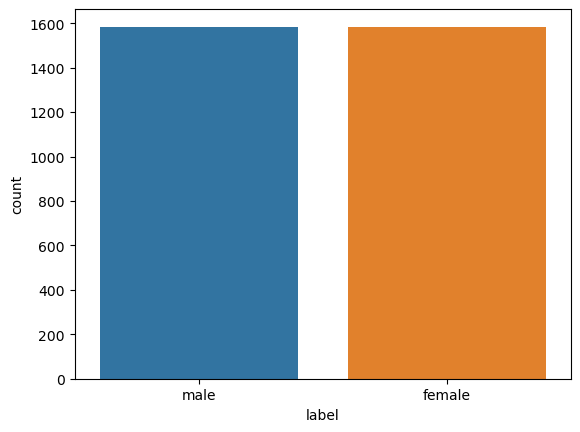

In [5]:
sns.countplot(x='label',data=sound)

In [7]:
categorical_label_encoder=['label']
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in categorical_label_encoder:
    sound[column] = label_encoder.fit_transform(sound[column])

In [8]:
sound

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,0
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,0
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,0
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,0


In [10]:
#dividing the data set into x and y.
x_encoded=sound.drop('label',axis=1)
y=sound['label']

In [11]:
x_encoded

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,0.200836,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,0.013683,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,0.008006,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,0.212202,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002


In [12]:
y

0       1
1       1
2       1
3       1
4       1
       ..
3163    0
3164    0
3165    0
3166    0
3167    0
Name: label, Length: 3168, dtype: int64

In [13]:
# Normalize
x = (x_encoded - np.min(x_encoded)) / (np.max(x_encoded) - np.min(x_encoded))
x

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.000046,0.000049,0.000024,0.000012,0.000069,0.000057,0.009822,0.209530,0.000682,0.000376,0.000000,0.000046,0.000064,0.000012,0.000211,0.000006,0.000006,0.000006,0.000000,0.000000
1,0.000050,0.000051,0.000031,0.000015,0.000071,0.000056,0.017122,0.484581,0.000681,0.000392,0.000000,0.000050,0.000082,0.000012,0.000191,0.000007,0.000006,0.000042,0.000036,0.000040
2,0.000059,0.000064,0.000028,0.000007,0.000101,0.000094,0.023486,0.782619,0.000646,0.000366,0.000000,0.000059,0.000075,0.000012,0.000207,0.000006,0.000006,0.000012,0.000006,0.000036
3,0.000115,0.000055,0.000121,0.000074,0.000159,0.000085,0.000941,0.003190,0.000736,0.000555,0.000064,0.000115,0.000068,0.000014,0.000191,0.000154,0.000006,0.000430,0.000424,0.000189
4,0.000103,0.000060,0.000095,0.000060,0.000157,0.000097,0.000841,0.003309,0.000742,0.000598,0.000080,0.000103,0.000081,0.000013,0.000204,0.000544,0.000006,0.004188,0.004182,0.000159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.000101,0.000065,0.000117,0.000038,0.000154,0.000116,0.001346,0.005063,0.000735,0.000583,0.000153,0.000101,0.000140,0.000064,0.000200,0.000636,0.000006,0.003215,0.003209,0.000124
3164,0.000089,0.000068,0.000059,0.000033,0.000156,0.000124,0.000530,0.001912,0.000734,0.000542,0.000010,0.000089,0.000144,0.000026,0.000211,0.000695,0.000030,0.002810,0.002780,0.000212
3165,0.000108,0.000073,0.000140,0.000026,0.000171,0.000146,0.001433,0.005043,0.000723,0.000500,0.000006,0.000108,0.000160,0.000030,0.000211,0.000377,0.000006,0.002243,0.002237,0.000149
3166,0.000110,0.000069,0.000141,0.000033,0.000168,0.000135,0.001215,0.004114,0.000726,0.000516,0.000162,0.000110,0.000132,0.000026,0.000191,0.000604,0.000006,0.002744,0.002738,0.000237


In [107]:
scaler=StandardScaler()
scaler.fit(x_encoded)
x=scaler.transform(x_encoded)

In [111]:
#train-test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train,x_test,y_train,y_test

(array([[-0.0182662 , -0.20180745,  0.10598461, ..., -0.25530848,
         -0.24709015, -0.38043211],
        [ 0.15835456,  0.4755315 ,  0.50433377, ...,  0.27727107,
          0.28565848, -0.72897904],
        [ 0.76892792, -0.67055382,  0.4469467 , ...,  0.99625346,
          1.00486912, -0.75027005],
        ...,
        [ 0.71628666,  0.35285606,  0.99919377, ...,  0.67670573,
          0.68521995, -0.67244475],
        [ 0.02983232,  0.05862641,  0.17650263, ..., -0.19539328,
         -0.18715592, -0.9330489 ],
        [-0.44043779,  0.54648806, -0.37779616, ...,  0.27727107,
          0.28565848, -0.42171608]]),
 array([[ 0.19810421, -1.78106493, -0.03564097, ..., -1.36928737,
         -1.35698311, -0.54274412],
        [ 0.26651063,  0.19157298,  0.27277335, ...,  1.04285417,
          1.05148463, -0.62828301],
        [-1.00964614,  1.80191395, -0.31141599, ...,  0.14634527,
          0.15913068,  1.32828292],
        ...,
        [-1.84120673,  1.2406108 , -1.56562879, ...,  

In [112]:
models = []
models.append(('Logistic Regression' ,LogisticRegression(random_state=42)))
models.append(('Naive bayes', GaussianNB()))
#models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 42)))
models.append(('Random Forest', RandomForestClassifier(random_state = 42)))
models.append(('SVM', SVC(gamma='auto', random_state = 42)))
models.append(('XGBoost', XGBClassifier(random_state = 42)))
models.append(('GradientBoosting', GradientBoostingClassifier(random_state = 42)))
results = []
names = []

In [113]:
for name, model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        print("{} : {}".format(name,accuracy))

Logistic Regression : 0.9810725552050473
Naive bayes : 0.9085173501577287
CART : 0.9668769716088328
Random Forest : 0.9842271293375394
SVM : 0.9826498422712934
XGBoost : 0.9794952681388013


/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


GradientBoosting : 0.9826498422712934


In [114]:
for name, model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        precision = precision_score(y_test, y_pred)*100
        print('Precision_score')
        print("{} : {:.2f}%".format(name,precision))

Precision_score
Logistic Regression : 98.51%
Precision_score
Naive bayes : 91.89%
Precision_score
CART : 98.47%
Precision_score
Random Forest : 99.40%
Precision_score
SVM : 98.80%
Precision_score
XGBoost : 99.09%


/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Precision_score
GradientBoosting : 99.10%


In [115]:
for name, model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        recall = recall_score(y_test, y_pred)*100
        print('Recall_score')
        print("{} : {:.2f}%".format(name,recall))

Recall_score
Logistic Regression : 97.92%
Recall_score
Naive bayes : 90.80%
Recall_score
CART : 95.25%
Recall_score
Random Forest : 97.63%
Recall_score
SVM : 97.92%
Recall_score
XGBoost : 97.03%


/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Recall_score
GradientBoosting : 97.63%


In [116]:
for name, model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        f1 = f1_score(y_test, y_pred)*100
        print('f1_score')
        print("{} : {:.2f}%".format(name,f1))

f1_score
Logistic Regression : 98.21%
f1_score
Naive bayes : 91.34%
f1_score
CART : 96.83%
f1_score
Random Forest : 98.50%
f1_score
SVM : 98.36%


/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


f1_score
XGBoost : 98.05%
f1_score
GradientBoosting : 98.36%


In [117]:
for name, model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        confusion = confusion_matrix(y_test, y_pred)
        print("{} : {}".format(name,confusion))
        print('----------------------------------')

Logistic Regression : [[292   5]
 [  7 330]]
----------------------------------
Naive bayes : [[270  27]
 [ 31 306]]
----------------------------------
CART : [[292   5]
 [ 16 321]]
----------------------------------
Random Forest : [[295   2]
 [  8 329]]
----------------------------------
SVM : [[293   4]
 [  7 330]]
----------------------------------
XGBoost : [[294   3]
 [ 10 327]]
----------------------------------


/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


GradientBoosting : [[294   3]
 [  8 329]]
----------------------------------


In [228]:
lr=LogisticRegression(solver='liblinear')
lr.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [229]:
y_pred_lr=lr.predict(x_test)
y_pred_lr

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,

In [230]:
accuracy_lr= accuracy_score(y_test, y_pred_lr)
accuracy_lr

0.9810725552050473

In [231]:
train_score_lr=lr.score(x_train,y_train)
train_score_lr

0.9739542225730071

In [232]:
test_score_lr=lr.score(x_test,y_test)
test_score_lr

0.9810725552050473

In [238]:
#applying hyper-parameter tuning for logistic regression
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [239]:
pipeline = Pipeline([
   ('scaler', StandardScaler()), ('clf', LogisticRegression())
])

In [240]:
param_grid = {
    'clf__C': [0.1, 1, 10],
    'clf__solver': ['liblinear', 'lbfgs'],
    'clf__penalty': ['l2']  # 'l1' is not compatible with 'lbfgs'
}

In [241]:
from sklearn.model_selection import GridSearchCV
grid_search_lr = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', error_score='raise')
grid_search_lr.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', LogisticRegression())]),
             param_grid={'clf__C': [0.1, 1, 10], 'clf__penalty': ['l2'],
                         'clf__solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [242]:
best_params = grid_search_lr.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'clf__C': 1, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}


In [243]:
best_C = best_params['clf__C']
best_solver = best_params['clf__solver']
best_penalty = best_params.get('clf__penalty', 'l2')
# The best accuracy score for Logistic Regression for best parameters is:

grid_search_lr.best_score_

0.9719843144592308

In [244]:
# Fitting the Logistic Regression with best parameters
lr_best_params = LogisticRegression(C=best_C, solver=best_solver, penalty=best_penalty)
lr_best_params.fit(x_train, y_train)
print(f"Train accuracy: {lr_best_params.score(x_train, y_train):.2f}")

Train accuracy: 0.97


In [245]:
print(f"Test accuracy: {lr_best_params.score(x_test, y_test):.2f}")

Test accuracy: 0.98


In [118]:
rf=RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [119]:
y_pred_rf=rf.predict(x_test)
y_pred_rf

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,

In [120]:
accuracy_rf= accuracy_score(y_test, y_pred_rf)
accuracy_rf

0.9842271293375394

In [121]:
test_score_rf=rf.score(x_test,y_test)
test_score_rf

0.9842271293375394

In [122]:
train_score_rf=rf.score(x_train,y_train)
train_score_rf

1.0

In [123]:
rf_classifier=RandomForestClassifier(random_state=42)

In [124]:
param_grid = {
    'max_depth': [2,3,5],            # Maximum depth of the tree
   # 'min_samples_split': [2, 3, 6],           # Minimum number of samples required to split an internal node
    #'min_samples_leaf': [1, 2, 4],             # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2'],   # Number of features to consider at each split
    #'criterion': ['gini', 'entropy'],         # Split criterion: Gini impurity or entropy
    #'max_leaf_nodes': [None, 10, 20, 30]       # Maximum number of leaf nodes in the tree
}

In [125]:
rf_gridsearch=GridSearchCV(rf_classifier, param_grid,cv=5, scoring='accuracy')
#['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start']

In [126]:
rf_gridsearch.fit(x_train, y_train) 

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 5],
                         'max_features': [None, 'sqrt', 'log2']},
             scoring='accuracy')

In [127]:
best_params_rf = rf_gridsearch.best_params_
best_params_rf

{'max_depth': 5, 'max_features': 'sqrt'}

In [128]:
#we are creating a new random forest classifier with the best hyper parameters
best_rf_classifier = RandomForestClassifier(**best_params_rf)
best_rf_classifier.fit(x_train,y_train)

RandomForestClassifier(max_depth=5)

In [129]:
y_pred_rf_tune=best_rf_classifier.predict(x_test)
y_pred_rf_tune

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,

In [130]:
accuracy_rf_tune= accuracy_score(y_test, y_pred_rf_tune)
accuracy_rf_tune

0.9810725552050473

In [131]:
train_score_rf_tune=best_rf_classifier.score(x_train,y_train)
train_score_rf_tune

0.9818468823993686

In [132]:
test_score_rf_tune=best_rf_classifier.score(x_test,y_test)
test_score_rf_tune

0.9810725552050473

In [133]:
recall_rf_tune = recall_score(y_test, y_pred_rf_tune)*100
recall_rf_tune

97.92284866468842

In [134]:
precision_rf_tune = precision_score(y_test, y_pred_rf_tune)*100
precision_rf_tune

98.50746268656717

In [135]:
f1_rf_tune = f1_score(y_test, y_pred_rf_tune)*100
f1_rf_tune

98.2142857142857

In [136]:
confusion_rf_tune = confusion_matrix(y_test, y_pred_rf_tune)
confusion_rf_tune

array([[292,   5],
       [  7, 330]])

In [137]:
classification_report__random_tune=classification_report(y_test, y_pred_rf_tune)
print(classification_report__random_tune)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       297
           1       0.99      0.98      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



In [138]:
dt=DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [139]:
y_pred_dt=dt.predict(x_test)
y_pred_dt

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,

In [140]:
accuracy_dt= accuracy_score(y_test, y_pred_dt)
accuracy_dt

0.9668769716088328

In [141]:
train_score_dt=dt.score(x_train,y_train)
train_score_dt

1.0

In [142]:
test_score_dt=dt.score(x_test,y_test)
test_score_dt

0.9668769716088328

In [143]:
#applying decision tree with hyper parameter tuning
dt_classifier = DecisionTreeClassifier(random_state=42)

In [144]:
param_grid = {
    'max_depth': [None, 5, 10, 15],            # Maximum depth of the tree
    #'min_samples_split': [2, 5, 10],           # Minimum number of samples required to split an internal node
    #'min_samples_leaf': [1, 2, 4],             # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2'],   # Number of features to consider at each split
    #'criterion': ['gini', 'entropy'],         # Split criterion: Gini impurity or entropy
   # 'splitter': ['best', 'random'],            # Strategy to choose the split at each node
    #'max_leaf_nodes': [None, 10, 20, 30]       # Maximum number of leaf nodes in the tree
}

In [145]:
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')

In [146]:
grid_search.fit(x_train, y_train) 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'max_features': [None, 'sqrt', 'log2']},
             scoring='accuracy')

In [147]:
best_params = grid_search.best_params_
best_params

{'max_depth': 5, 'max_features': None}

In [148]:
#we are creating a new decision tree classifier with the best hyper parameters
best_dt_classifier = DecisionTreeClassifier(**best_params)
best_dt_classifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [149]:
y_pred_dt_tune=best_dt_classifier.predict(x_test)
y_pred_dt_tune

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,

In [150]:
accuracy_decision_dt_tune= accuracy_score(y_test, y_pred_dt_tune)
accuracy_decision_dt_tune

0.9637223974763407

In [151]:
train_score_dt_tune=best_dt_classifier.score(x_train,y_train)
train_score_dt_tune

0.9869771112865036

In [152]:
test_score_dt_tune=best_dt_classifier.score(x_test,y_test)
test_score_dt_tune

0.9637223974763407

Random forest after hyper parameter tuning is not giving over fitting scenario

In [153]:
#Applying SVM with default parameters
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9826498422712934


In [154]:
#applying svm kernel=linear
svc=SVC(kernel='linear')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9763406940063092


In [155]:
#applying svm kernel=rbf
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9826498422712934


In [156]:
#applying svm kernel=poly
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9684542586750788


In [157]:
#applying svm kernel=sigmoid
svc=SVC(kernel='sigmoid')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8296529968454258


In [158]:
#Applying different kernals with cross validation
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='linear')
scores = cross_val_score(svc, x, y, cv=20, scoring='accuracy')
print(scores)
print(scores.mean())

[0.93081761 0.89308176 0.99371069 0.94968553 0.95597484 0.98742138
 0.98113208 0.96855346 0.92405063 1.         0.98101266 0.99367089
 1.         0.98101266 0.94936709 1.         0.98734177 0.92405063
 0.99367089 0.98101266]
0.9687783615954144


In [159]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='rbf')
scores = cross_val_score(svc, x, y, cv=20, scoring='accuracy')
print(scores)
print(scores.mean())

[0.93710692 0.9245283  0.98742138 0.9245283  0.94968553 0.98113208
 0.96855346 0.96226415 0.93670886 1.         0.99367089 1.
 1.         0.97468354 0.96202532 1.         0.99367089 0.83544304
 0.99367089 0.99367089]
0.9659382214791817


In [160]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='poly')
scores = cross_val_score(svc, x, y, cv=20, scoring='accuracy')
print(scores)
print(scores.mean())

[0.94968553 0.86163522 0.97484277 0.93710692 0.91823899 0.93710692
 0.96855346 0.86792453 0.91772152 1.         1.         0.98101266
 1.         0.96202532 0.93670886 1.         0.99367089 0.7721519
 0.99367089 0.96202532]
0.9467040840697397


In [161]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='sigmoid')
scores = cross_val_score(svc, x, y, cv=20, scoring='accuracy')
print(scores)
print(scores.mean())

[0.78616352 0.50314465 0.88050314 0.64779874 0.79245283 0.88050314
 0.8490566  0.94339623 0.85443038 0.75949367 0.91139241 0.80379747
 0.73417722 0.78481013 0.7721519  0.86075949 0.91139241 0.5
 0.84810127 0.74683544]
0.7885180320038213


Applying SVM with regularization parameter-refer details in Q6

The 'C' parameter tells the SVM optimization how much we want to avoid miss-classifying each training example.

For large values of C the optimization will choose a smaller margin hyperplane, if that hyperplane does a better job of getting most of the training points classified correctly. Conversly a very small value of C will cause the optimizer to look for a larger margin seperating hyperplane, even if that hyperplane miss-classifies more points.Thus for very large values of C we can cause overfitting and for very small value of C it can cause underfitting.

Thus the value of C must be chosen in such a manner that it generalized the unseen data well.

In [163]:
C_range=list(range(1,26))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, x, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.9696991175178692, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.9693836601046201, 0.9693836601046201, 0.969068202691371, 0.9687527452781215, 0.9684372878648724, 0.9684372878648724, 0.9684372878648724, 0.9684372878648724, 0.9681208321686698, 0.9681208321686698, 0.9681208321686698, 0.9681208321686698, 0.9678043764724673, 0.9678043764724673, 0.9678043764724673, 0.9678043764724673, 0.9681208321686698, 0.968436289581919, 0.968436289581919, 0.9681198338857164, 0.9681198338857164]


In [165]:
np.mean(acc_score)

0.9684870023559478

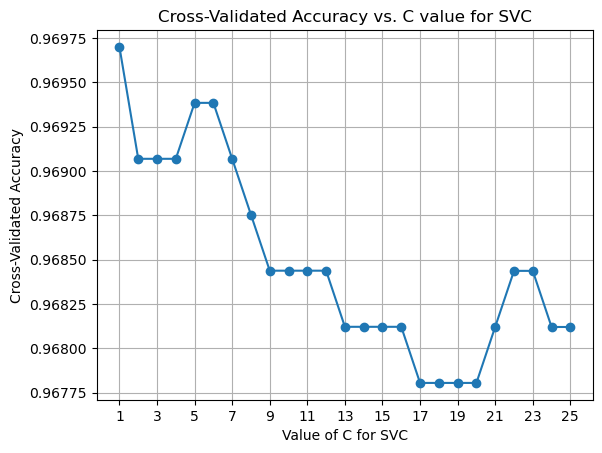

In [166]:
plt.plot(C_range, acc_score, marker='o')
plt.xticks(np.arange(1, 27, 2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross-Validated Accuracy vs. C value for SVC')
plt.grid(True)
plt.show()

For kernal=linear C=(1 to 2) & C=(5 to 7) gives the maximized accuracy scores of almost 97%

In [180]:
C_range=list(np.arange(0.1,6,0.1))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, x, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.9706474863235236, 0.9693846583875733, 0.9693836601046201, 0.9693836601046201, 0.9696991175178692, 0.9696991175178692, 0.9693836601046201, 0.9696981192349158, 0.9693826618216667, 0.9696991175178692, 0.9696991175178692, 0.9696991175178692, 0.9696991175178692, 0.9690672044084174, 0.9693836601046201, 0.9693836601046201, 0.9693836601046201, 0.9693836601046201, 0.969068202691371, 0.969068202691371, 0.9693836601046201, 0.9693836601046201, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.9693836601046201, 0.9693836601046201, 0.9693836601046201, 0.9693836601046201, 0.9693836601046201, 0.969

In [181]:
np.mean(acc_score)

0.9692767253882645

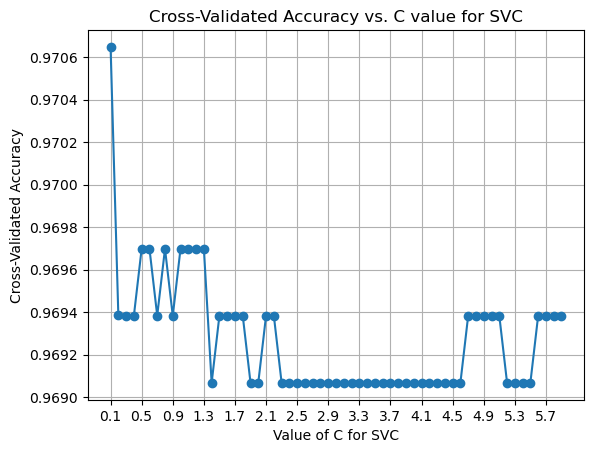

In [184]:
plt.plot(C_range, acc_score, marker='o')
plt.xticks(np.arange(0.1,6,0.4))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross-Validated Accuracy vs. C value for SVC')
plt.grid(True)
plt.show()

For kernal=linear C=(0.1 to 0.5) gives the maximized accuracy scores from 96% to 97% range

In [167]:
C_range=list(range(1,26))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='rbf', C=c)
    scores = cross_val_score(svc, x, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.9665325639899376, 0.965268737771034, 0.964636824661582, 0.964954278640738, 0.963373996725632, 0.963373996725632, 0.9627430818991334, 0.9614812522461366, 0.9608473425707784, 0.9602164277442797, 0.9589526015253764, 0.9586371441121271, 0.9576897735894262, 0.9576907718723795, 0.9570588587629277, 0.9573733178932239, 0.9573743161761771, 0.9567434013496786, 0.9570588587629277, 0.9567434013496786, 0.9567424030667254, 0.9564269456534762, 0.9567434013496786, 0.9561114882402268, 0.9557960308269775]


In [168]:
np.mean(acc_score)

0.9596228487002356

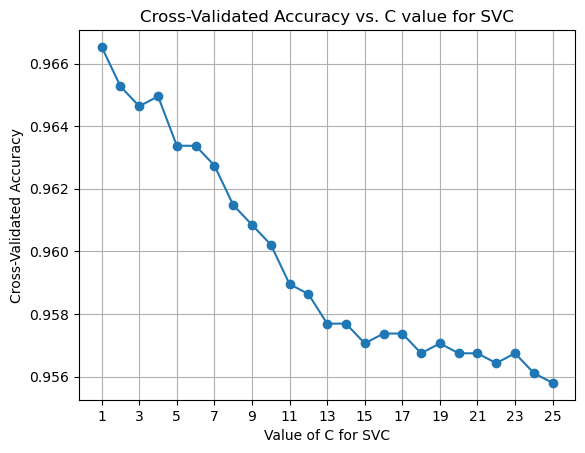

In [169]:
plt.plot(C_range, acc_score, marker='o')
plt.xticks(np.arange(1, 27, 2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross-Validated Accuracy vs. C value for SVC')
plt.grid(True)
plt.show()

For kernal=rbf C=(1 to 4) gives the maximized accuracy scores of almost 97%

In [187]:
C_range=[0.0001,0.001,0.01,0.1,1,10,100]
acc_score=[]
for c in C_range:
    svc = SVC(kernel='rbf', C=c)
    scores = cross_val_score(svc, x, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.5582318412330791, 0.5582318412330791, 0.8879207762648245, 0.9583316695284111, 0.9665325639899376, 0.9602164277442797, 0.9491714251487442]


In [188]:
np.mean(acc_score)

0.8340909350203366

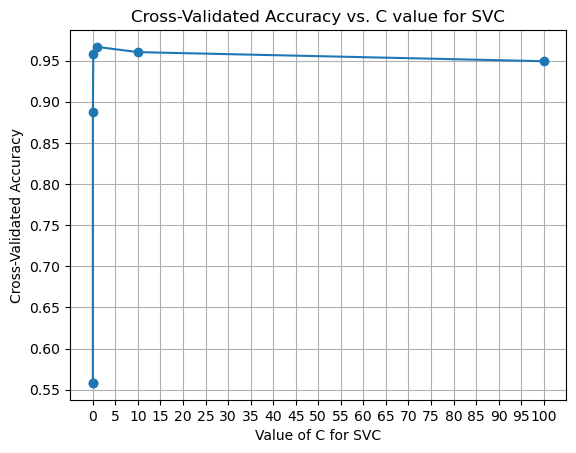

In [191]:
plt.plot(C_range, acc_score, marker='o')
plt.xticks(np.arange(0.0001, 101,5))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross-Validated Accuracy vs. C value for SVC')
plt.grid(True)
plt.show()

For kernal=rbf C=(0 to 5) gives the maximized accuracy scores around 96% to 95%

In [198]:
C_range=[0.01,0.02,0.03,0.04,0.05]
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, x, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.967173461645969, 0.9684372878648725, 0.9693826618216667, 0.9700155732140718, 0.9706474863235236]


In [204]:
np.mean(acc_score)

0.8535714570937986

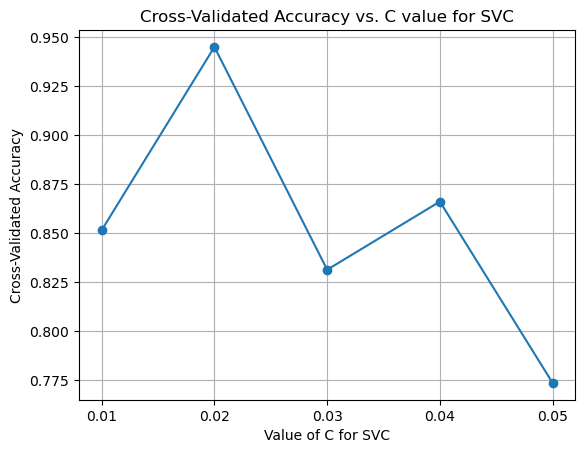

In [210]:
plt.plot(C_range, acc_score, marker='o')
plt.xticks(np.arange(0.01, 0.06,0.01))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross-Validated Accuracy vs. C value for SVC')
plt.grid(True)
plt.show()

For kernal=linear C=(0.01 to 0.02) gives the maximized accuracy scores around 94% 

In [211]:
C_range=[0.01,0.02,0.03,0.04,0.05]
acc_score=[]
for c in C_range:
    svc = SVC(kernel='rbf', C=c)
    scores = cross_val_score(svc, x, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.8879207762648245, 0.9188625564029866, 0.9419188994928722, 0.9485465000199657, 0.9523349838278161]


In [212]:
np.mean(acc_score)

0.9299167432016929

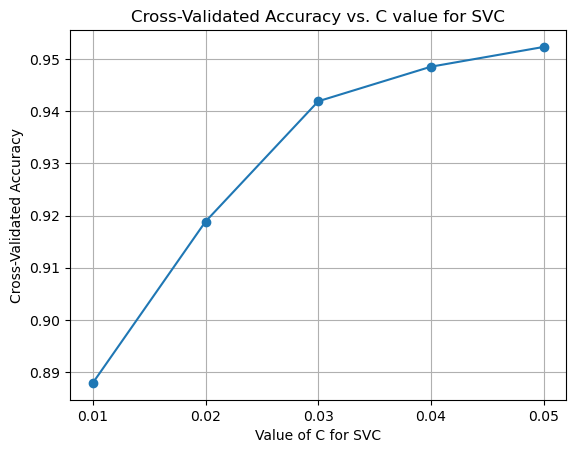

In [213]:
plt.plot(C_range, acc_score, marker='o')
plt.xticks(np.arange(0.01, 0.06,0.01))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross-Validated Accuracy vs. C value for SVC')
plt.grid(True)
plt.show()

For kernal=rbf C=(0.04 to 0.05) gives the maximized accuracy scores around 96% to 95%

In [202]:
degree=[2,3,4,5,6]
acc_score=[]
for d in degree:
    svc = SVC(kernel='poly', degree=d)
    scores = cross_val_score(svc, x, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.8515842750469194, 0.9450654873617378, 0.8313989937307829, 0.8661622010142555, 0.7736463283152977]


In [218]:
np.mean(acc_score)

0.9299167432016929

Text(0, 0.5, 'Cross-Validated Accuracy')

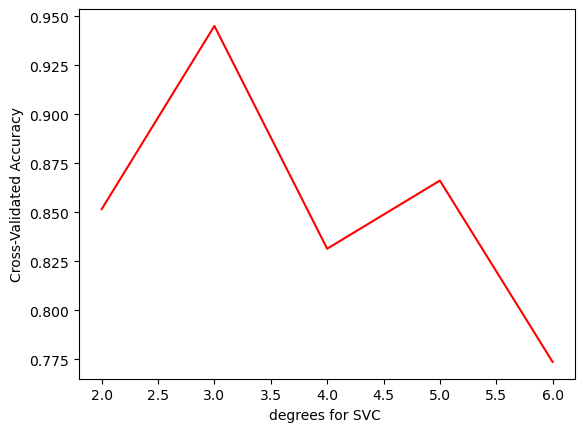

In [203]:
plt.plot(degree,acc_score,color='r')
plt.xlabel('degrees for SVC ')
plt.ylabel('Cross-Validated Accuracy')

For kernal=poly C=(2 to 3) gives the maximized accuracy scores around 92% to 94%

hyper-parameter tuning of SVM

In [219]:
#Let us perform Grid search technique to find the best parameter
from sklearn.svm import SVC
svm_model= SVC()

tuned_parameters = {
 'C': (np.arange(1,7,1)) , 'kernel': ['linear'], 'C': (np.arange(0.1,0.5,0.1)) , 'kernel': ['linear'],
 'C': (np.arange(0.1,1,0.1)) , 'gamma': [0.01,0.02,0.03,0.04,0.05], 'kernel': ['rbf'],
 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05], 'C':(np.arange(0.1,1,0.1)) , 'kernel':['poly']
                   }

In [225]:
tuned_parameters = {
 'C': (np.arange(1,7,1)) , 'kernel': ['linear'], 'C': (np.arange(0.1,0.5,0.1)) , 'kernel': ['linear'], 'C': (np.arange(0.01,0.04,0.01)) , 'kernel': ['linear'],
 'C': (np.arange(0,5,0.5)) , 'kernel': ['rbf'], 'C': (np.arange(0.02,0.05,0.001)) , 'kernel': ['rbf'],
'degree': [2,3,4] ,'C':[0.01,0.02,0.03,0.04,0.05], 'C':(np.arange(0.1,1,0.1)) , 'kernel':['poly']

                   }

In [227]:
from sklearn.model_selection import GridSearchCV

model_svm = GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy')
model_svm.fit(x_train, y_train)
print(model_svm.best_score_)
print(model_svm.best_params_)
y_pred= model_svm.predict(x_test)
print(metrics.accuracy_score(y_pred,y_test))

0.9553997696928201
{'C': 0.9, 'degree': 3, 'kernel': 'poly'}
0.9637223974763407


Linear SVM without hyper-parameter tuning is best but poly is also neck to neck

In [233]:
#fitting the svm model with the best parameters 
#{'C': 0.9, 'degree': 3, 'kernel': 'poly'}
svc_best=SVC(kernel='poly',C=0.9, degree=3)
svc_best.fit(x_train,y_train)

SVC(C=0.9, kernel='poly')

In [234]:
y_pred_svc=svc_best.predict(x_test)
y_pred_svc

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,

In [235]:
accuracy_svc_tune= accuracy_score(y_test, y_pred_svc)
accuracy_svc_tune

0.9637223974763407

In [236]:
train_score_svc_tune=svc_best.score(x_train,y_train)
train_score_svc_tune

0.9672454617205999

In [237]:
test_score_svc_tune=svc_best.score(x_test,y_test)
test_score_svc_tune

0.9637223974763407

Linear SVM without hyper-parameter tuning is best but poly is also neck to neck without any overfitting scenario

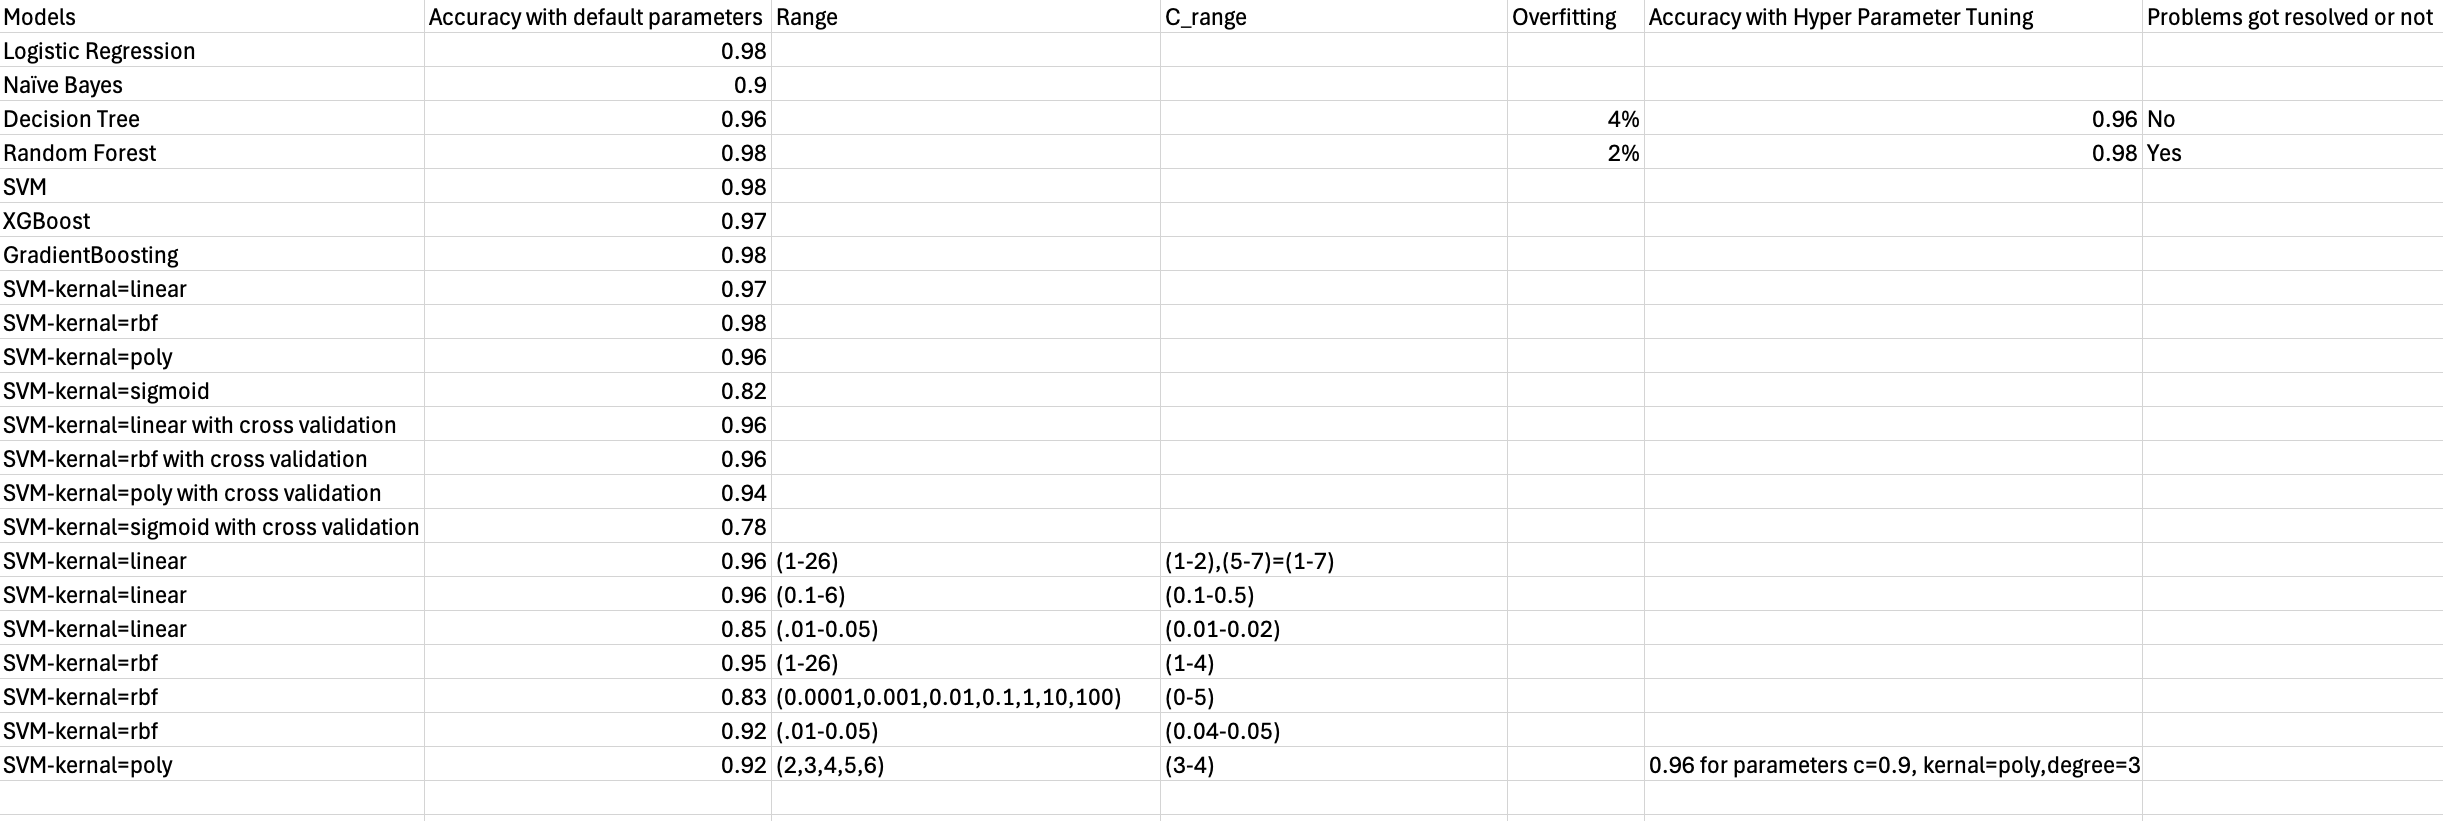